https://www.fun-coding.org/recommend_basic4.html

# 4. 유사도와 knn을 활용한 예측 값 계산 및 추천 목록 생성 기법
- 사용자들 간의 유사도를 바탕으로 모든 항목에 대해 예측 값을 계산하고 높은 예측 값을 갖는 상위 N개의 추천 목록을 생성

### K Nearest Neighbors(KNN) 가중치 예측 기법
- 유사도가 구해지면 평점을 예측하고자 하는 사용자(또는 상품)과 유사도가 큰 K 개의 사용자(또는 상품)벡터를 사용하여 가중 평균을 구해서 가중치를 예측

### 4.1 KNN Baxic
- 평점들을 단순히 가중 평균 한다. 다음 식에서 $N^k$는 $k$개의 가장 유사도가 큰 벡터의 집합이다.

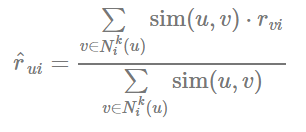

- 1. 대상과 가장 유사도가 높은 k의 대상과 영화 평점과 유사도를 통해 추측평점(유사도 x (타인의 영화평점)을 구한다.
- 2. 추측평점의 총합을 구한 후,
- 3. 추측평점 총합계/유사도 합계를 통해 예상평점을 뽑아낼 수 있다.

In [1]:
import math 

# 1. 코사인 유사도
def sim_cosine(data , name1, name2):
    sum_name1 = 0
    sum_name2 = 0
    sum_name1_name2 = 0
    count = 0
    
    for movies in data[name1]:
        if movies in data[name2]: #같은 영화를 봤다면
            sum_name1 += pow(data[name1][movies], 2)
            sum_name2 += pow(data[name2][movies], 2)
            
            print('sum_name1 : {} \nsum_name2 : {}\n'.format(sum_name1, sum_name2))
            sum_name1_name2 += data[name1][movies]*data[name2][movies]

    return sum_name1_name2 / (math.sqrt(sum_name1)*math.sqrt(sum_name2))


#2. 피어슨 상관계수 유사도
def sim_pearson(data, name1, name2):
    avg_name1 = 0
    avg_name2 = 0
    count = 0
    for movies in data[name1]:
        if movies in data[name2]: #같은 영화를 봤다면
            avg_name1 = data[name1][movies]
            avg_name2 = data[name2][movies]
            count += 1
    
    avg_name1 = avg_name1 / count
    avg_name2 = avg_name2 / count
    
    sum_name1 = 0
    sum_name2 = 0
    sum_name1_name2 = 0
    count = 0
    for movies in data[name1]:
        if movies in data[name2]: #같은 영화를 봤다면
            sum_name1 += pow(data[name1][movies] - avg_name1, 2)
            sum_name2 += pow(data[name2][movies] - avg_name2, 2)
            sum_name1_name2 += (data[name1][movies] - avg_name1) * (data[name2][movies] - avg_name2)
    
    return sum_name1_name2 / (math.sqrt(sum_name1)*math.sqrt(sum_name2))


def top_match(data, name, index=3, sim_function=sim_pearson):
    li=[]
    for i in data: #딕셔너리를 돌고
        if name!=i: #자기 자신이 아닐때만
            li.append((sim_function(data,name,i),i)) #sim_function()을 통해 상관계수를 구하고 li[]에 추가
    li.sort() #오름차순
    li.reverse() #내림차순
    return li[:index]

In [2]:
ratings_expand = {
    '마동석': {
        '택시운전사': 3.5,
        '남한산성': 1.5,
        '킹스맨:골든서클': 3.0,
        '범죄도시': 3.5,
        '아이 캔 스피크': 2.5,
        '꾼': 3.0,
    },
    '이정재': {
        '택시운전사': 5.0,
        '남한산성': 4.5,
        '킹스맨:골든서클': 0.5,
        '범죄도시': 1.5,
        '아이 캔 스피크': 4.5,
        '꾼': 5.0,
    },
    '윤계상': {
        '택시운전사': 3.0,
        '남한산성': 2.5,
        '킹스맨:골든서클': 1.5,
        '범죄도시': 3.0,
        '꾼': 3.0,
        '아이 캔 스피크': 3.5,
    },
    '설경구': {
        '택시운전사': 2.5,
        '남한산성': 3.0,
        '범죄도시': 4.5,
        '꾼': 4.0,
    },
    '최홍만': {
        '남한산성': 4.5,
        '킹스맨:골든서클': 3.0,
        '꾼': 4.5,
        '범죄도시': 3.0,
        '아이 캔 스피크': 2.5,
    },
    '홍수환': {
        '택시운전사': 3.0,
        '남한산성': 4.0,
        '킹스맨:골든서클': 1.0,
        '범죄도시': 3.0,
        '꾼': 3.5,
        '아이 캔 스피크': 2.0,
    },
    '나원탁': {
        '택시운전사': 3.0,
        '남한산성': 4.0,
        '꾼': 3.0,
        '범죄도시': 5.0,
        '아이 캔 스피크': 3.5,
    },
    '소이현': {
        '남한산성': 4.5, 
        '아이 캔 스피크': 1.0,
        '범죄도시': 4.0
    }
}

In [3]:
import pandas as pd
for i in list(ratings_expand):
    set_col = []
    print(ratings_expand[i])

{'택시운전사': 3.5, '남한산성': 1.5, '킹스맨:골든서클': 3.0, '범죄도시': 3.5, '아이 캔 스피크': 2.5, '꾼': 3.0}
{'택시운전사': 5.0, '남한산성': 4.5, '킹스맨:골든서클': 0.5, '범죄도시': 1.5, '아이 캔 스피크': 4.5, '꾼': 5.0}
{'택시운전사': 3.0, '남한산성': 2.5, '킹스맨:골든서클': 1.5, '범죄도시': 3.0, '꾼': 3.0, '아이 캔 스피크': 3.5}
{'택시운전사': 2.5, '남한산성': 3.0, '범죄도시': 4.5, '꾼': 4.0}
{'남한산성': 4.5, '킹스맨:골든서클': 3.0, '꾼': 4.5, '범죄도시': 3.0, '아이 캔 스피크': 2.5}
{'택시운전사': 3.0, '남한산성': 4.0, '킹스맨:골든서클': 1.0, '범죄도시': 3.0, '꾼': 3.5, '아이 캔 스피크': 2.0}
{'택시운전사': 3.0, '남한산성': 4.0, '꾼': 3.0, '범죄도시': 5.0, '아이 캔 스피크': 3.5}
{'남한산성': 4.5, '아이 캔 스피크': 1.0, '범죄도시': 4.0}


In [4]:
def getRecommendation (data , person, k = 3 , sim_function = sim_pearson):
    
    result = top_match(data , person , k)
    
    score = 0     #평점 합을 위한 변수
    li = list()   #리턴을 위한 리스트
    score_dic = dict() # 유사도 총합을 위한 dic
    sim_dic = dict()   # 평점 총합을 위한 dic
    
    for sim, name in result:
        print(sim, name)
        if sim <0 : continue # 유사도가 양수인 사람만
        for movie in data[name]:
            if movie not in data[person]: #name이 평가를 내리지 않은 영화
                score += sim * data[name][movie]  #그 사람의 평점 * 유사도
                score_dic.setdefault(movie , 0)  #기본값 설정
                score_dic[movie] += score  #합계 구함
                
                #조건에 맞는 사람의 유사도의 누적합을 구한다
                sim_dic.setdefault(movie , 0)
                sim_dic[movie] += sim
                
            score = 0   #영화가 바뀌었으니 초기화한다.
    for key in score_dic:
        score_dic[key] = score_dic[key] / sim_dic[key]  #평점 총합 / 유사도 총합
        li.append((score_dic[key] , key))  #list((tuple))의 리턴을 위해서.
        
    li.sort()    #오름차순
    li.reverse()  #내림차순
    return li

In [5]:
getRecommendation(ratings_expand, '소이현')


0.9330597055272909 홍수환
0.8909876971472571 최홍만
0.8452277090445156 나원탁


[(3.675468553454334, '꾼'),
 (3.0000000000000004, '택시운전사'),
 (1.976934805357391, '킹스맨:골든서클')]

In [6]:
getRecommendation(ratings_expand, '최홍만', k=2, sim_function=sim_cosine)

0.9608329054174726 홍수환
0.9517663735117331 소이현


[(3.0, '택시운전사')]

### 4.2. KNN With Means
- 평점들을 평균값 기준으로 가중평균한다.

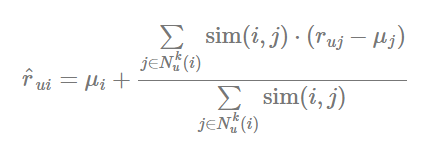

In [7]:
for name in ratings_expand:
    sum = 0
    count = 0
    for movies in ratings_expand[name]:
        sum += ratings_expand[name][movies]
        count += 1
    ratings_expand[name]['avg'] = sum / count

In [8]:
ratings_expand


{'마동석': {'택시운전사': 3.5,
  '남한산성': 1.5,
  '킹스맨:골든서클': 3.0,
  '범죄도시': 3.5,
  '아이 캔 스피크': 2.5,
  '꾼': 3.0,
  'avg': 2.8333333333333335},
 '이정재': {'택시운전사': 5.0,
  '남한산성': 4.5,
  '킹스맨:골든서클': 0.5,
  '범죄도시': 1.5,
  '아이 캔 스피크': 4.5,
  '꾼': 5.0,
  'avg': 3.5},
 '윤계상': {'택시운전사': 3.0,
  '남한산성': 2.5,
  '킹스맨:골든서클': 1.5,
  '범죄도시': 3.0,
  '꾼': 3.0,
  '아이 캔 스피크': 3.5,
  'avg': 2.75},
 '설경구': {'택시운전사': 2.5, '남한산성': 3.0, '범죄도시': 4.5, '꾼': 4.0, 'avg': 3.5},
 '최홍만': {'남한산성': 4.5,
  '킹스맨:골든서클': 3.0,
  '꾼': 4.5,
  '범죄도시': 3.0,
  '아이 캔 스피크': 2.5,
  'avg': 3.5},
 '홍수환': {'택시운전사': 3.0,
  '남한산성': 4.0,
  '킹스맨:골든서클': 1.0,
  '범죄도시': 3.0,
  '꾼': 3.5,
  '아이 캔 스피크': 2.0,
  'avg': 2.75},
 '나원탁': {'택시운전사': 3.0,
  '남한산성': 4.0,
  '꾼': 3.0,
  '범죄도시': 5.0,
  '아이 캔 스피크': 3.5,
  'avg': 3.7},
 '소이현': {'남한산성': 4.5, '아이 캔 스피크': 1.0, '범죄도시': 4.0, 'avg': 3.1666666666666665}}

In [9]:
def getRecommendation (data, person, k=3, sim_function=sim_pearson):
    
    result = top_match(data, person, k)
    
    score = 0 # 평점 합을 위한 변수
    li = list() # 리턴을 위한 리스트
    score_dic = dict() # 유사도 총합을 위한 dic
    sim_dic = dict() # 평점 총합을 위한 dic

    for sim, name in result: # 튜플이므로 한번에
        print(sim, name)
        if sim < 0 : continue #유사도가 양수인 사람만
        for movie in data[name]: 
            if movie not in data[person]: #name이 평가를 내리지 않은 영화
                score += sim * (data[name][movie] - data[name]['avg']) # 그사람의 영화평점 * 유사도
                score_dic.setdefault(movie, 0) # 기본값 설정
                score_dic[movie] += score # 합계 구함

                # 조건에 맞는 사람의 유사도의 누적합을 구한다
                sim_dic.setdefault(movie, 0) 
                sim_dic[movie] += sim

            score = 0  #영화가 바뀌었으니 초기화한다
    
    for key in score_dic: 
        score_dic[key] = data[person]['avg'] + (score_dic[key] / sim_dic[key]) # 평점 총합/ 유사도 총합
        li.append((score_dic[key],key)) # list((tuple))의 리턴을 위해서.
    li.sort() #오름차순
    li.reverse() #내림차순
    return li

In [10]:
getRecommendation(ratings_expand, '소이현')


0.9661614876137535 홍수환
0.9438405255065262 최홍만
0.9437757473484876 설경구


[(3.91667234143915, '꾼'),
 (2.7989920841776077, '택시운전사'),
 (2.0343626946178484, '킹스맨:골든서클')]

In [11]:
getRecommendation(ratings_expand, '최홍만', k=2, sim_function=sim_cosine)

0.9652129842456227 홍수환
0.9438405255065262 소이현


[(3.75, '택시운전사')]

### 여기가지가 추천시스템에서 사용되는 가장 일반적인 방법